In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import requests
import BeautifulSoup as soup
import os
import time

In [2]:
url = 'http://www.chessgames.com/directory/'
fname = 'chess.htm'

In [96]:
start = 65

raw_pages = []

for i in range(26):
    letter = chr(start + i)
    page = url + letter + '.html'
    fname = letter + '.html'
    if not(os.path.isfile(fname)):
        r = requests.get(page)
        time.sleep(1)
        print letter, r
        f = open(fname, 'w')
        f.write(r.text.encode('ascii', 'ignore'))
        r.close()
    #
    f = open(fname, 'r')
    lines = f.readlines()
    f.close()
    raw_pages.append(' '.join(lines))


P <Response [200]>
Q <Response [200]>
R <Response [200]>
S <Response [200]>
T <Response [200]>
X <Response [200]>
Y <Response [200]>
Z <Response [200]>


In [97]:
dfs = []
for body in raw_pages:
    b = soup.BeautifulSoup(body)
    rows = b.findAll('tr')
    prows = []
    for row in rows:
        cells = len(row.findAll('td'))
        if cells == 5:
            prows.append(row)
    ratings = []
    names = []
    yearss = []
    gamess = []

    for prow in prows:
        cells = prow.findAll('td')
        try:
            rating = int(cells[0].text.replace('&nbsp;', ''))
        except ValueError:
            rating = -1
        name   = cells[2].text.replace('&nbsp;', '')
        years  = cells[3].text.replace('&nbsp;', '')
        games  = cells[4].text.replace('&nbsp;', '')
        ratings.append(rating)
        names.append(name)
        yearss.append(years)
        gamess.append(games)

    df = pd.DataFrame({'rating': ratings, 'name': names, 'years': yearss, 'games': gamess})
    dfs.append(df)

In [100]:
df = dfs[0]
for i in range(2, len(dfs)):
    df2 = dfs[i]
    df = df.append(df2)

df.shape

(8521, 4)

In [101]:
df.sort('rating', inplace=True)
df.head()

,games,name,rating,years
194,30,"ZYTOGORSKI, Adolf",-1,1841-1860
23,32,"EDWARD-DAPPA, Rachael",-1,2003-2010
163,39,"NIELSEN, Palle Moeller",-1,1952-1960
162,67,"NIELSEN, Julius",-1,1933-1985
158,28,"NIELSEN, Hartvig",-1,1936-1961


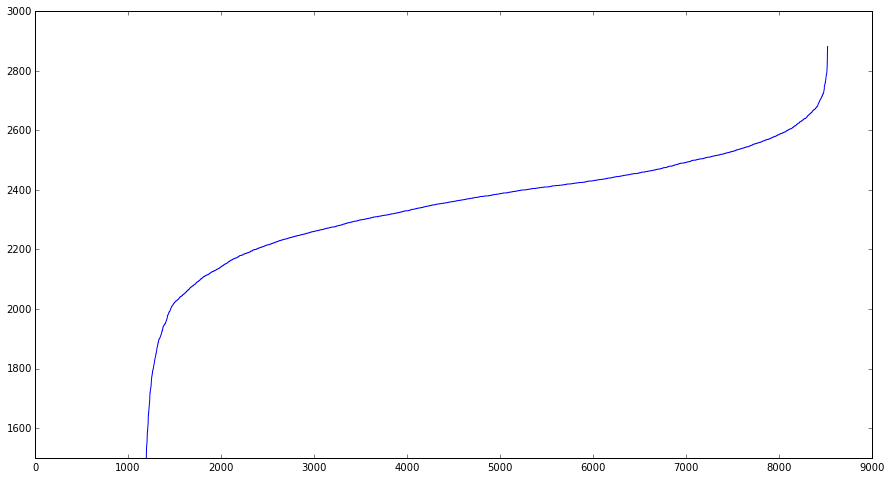

In [102]:
plt.figure(figsize=(15,8))
plt.plot(df['rating'])
plt.ylim([1500, 3000])
plt.show()

In [103]:
df['games'] = df['games'].apply(lambda x: int(x.replace(',', '')))

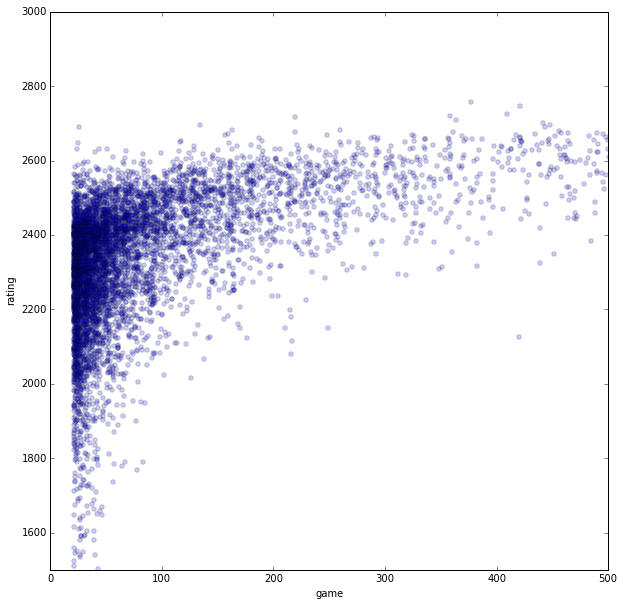

In [104]:
plt.figure(figsize=(10,10))
plt.scatter(df['games'], df['rating'], alpha=0.2)
plt.xlabel('game')
plt.ylabel('rating')
plt.ylim([1500, 3000])
plt.xlim([0, 500])
plt.show()

In [105]:
df.to_csv('chessdata_full.csv', sep='\t', index=False)

In [106]:
df['years_low'] = df['years'].apply(lambda x: x.split('-')[0])
def cleanit(x):
    arr = x.split('-')
    if len(arr)==1:
        return x
    else:
        return arr[1]
df['years_high'] = df['years'].apply(cleanit)

In [107]:
df['active'] = df['years_high'].astype(int) - df['years_low'].astype(int)

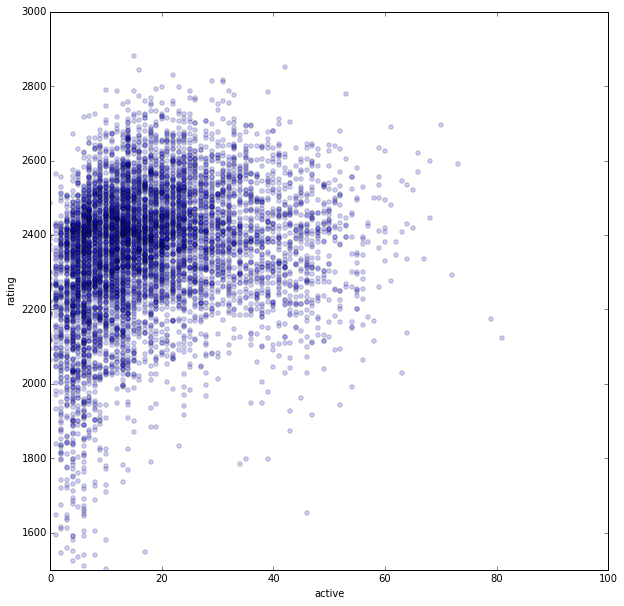

In [109]:
plt.figure(figsize=(10,10))
plt.scatter(df['active'], df['rating'], alpha=0.2)
plt.xlabel('active')
plt.ylabel('rating')
plt.xlim([0, 100])
plt.ylim([1500, 3000])
plt.show()

In [110]:
!ls

A.html                    F.html                    K.html                    P.html                    U.html                    Y.html                    chessdata_full.csv
B.html                    G.html                    L.html                    Q.html                    Untitled1.ipynb           Z.html                    test.csv
C.html                    H.html                    M.html                    R.html                    V.html                    beautiful-soup-demo.ipynb
D.html                    I.html                    N.html                    S.html                    W.html                    chess.htm
E.html                    J.html                    O.html                    T.html                    X.html                    chessdata.csv
